In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
# Load dataset (California Housing or synthetic Customer dataset)
def load_data(dataset="california_housing"):
    if dataset == "california_housing":
        data = fetch_california_housing()
        df = pd.DataFrame(data.data, columns=data.feature_names)
    elif dataset == "customers":
        # Creating a synthetic dataset with make_blobs for customers
        X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.8, random_state=42)
        df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
    return df


In [6]:
# Select dataset
dataset = load_data("california_housing")  # Change to "customers" if using synthetic data
print("Dataset Sample:")
print(dataset.head())

# 1. Check for Missing Values
print("\nChecking for missing values...")
print(dataset.isnull().sum())

Dataset Sample:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Checking for missing values...
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [8]:
# Select dataset
dataset = load_data("california_housing")  # Change to "customers" if using synthetic data
print("Dataset Sample:")
print(dataset.head())

# 1. Check for Missing Values
print("\nChecking for missing values...")
print(dataset.isnull().sum())

Dataset Sample:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Checking for missing values...
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [10]:
# 2. Standardize or Normalize the Data
# For clustering, standardization is typically preferred.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=dataset.columns)

print("\nStandardized Data Sample:")
print(data_scaled.head())


Standardized Data Sample:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


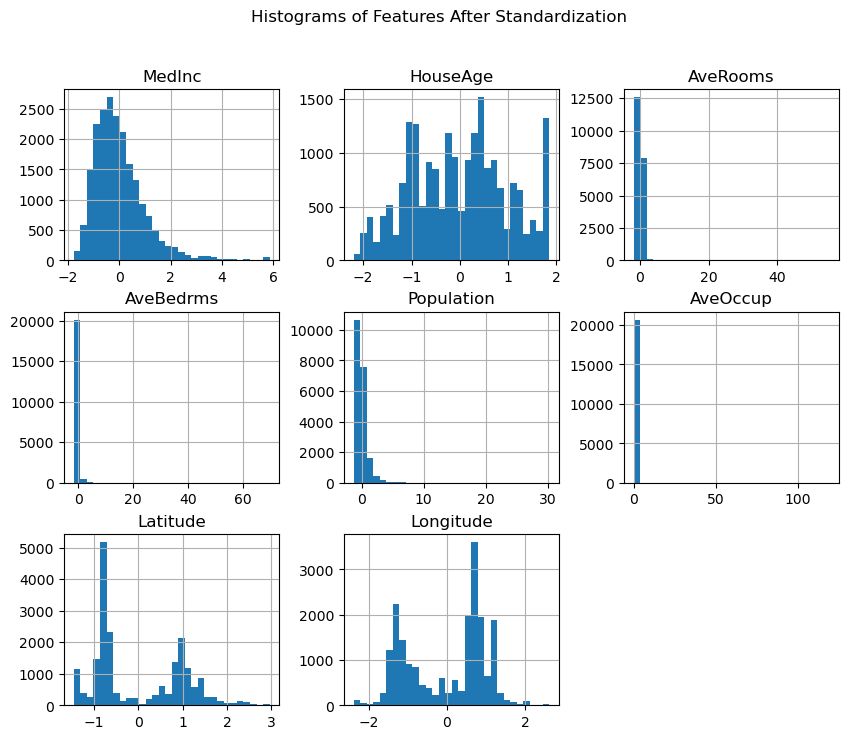

In [12]:
# 3. Visualize the Dataset to Understand its Structure and Features
# a. Histograms for each feature to observe distributions
data_scaled.hist(bins=30, figsize=(10, 8))
plt.suptitle("Histograms of Features After Standardization")
plt.show()

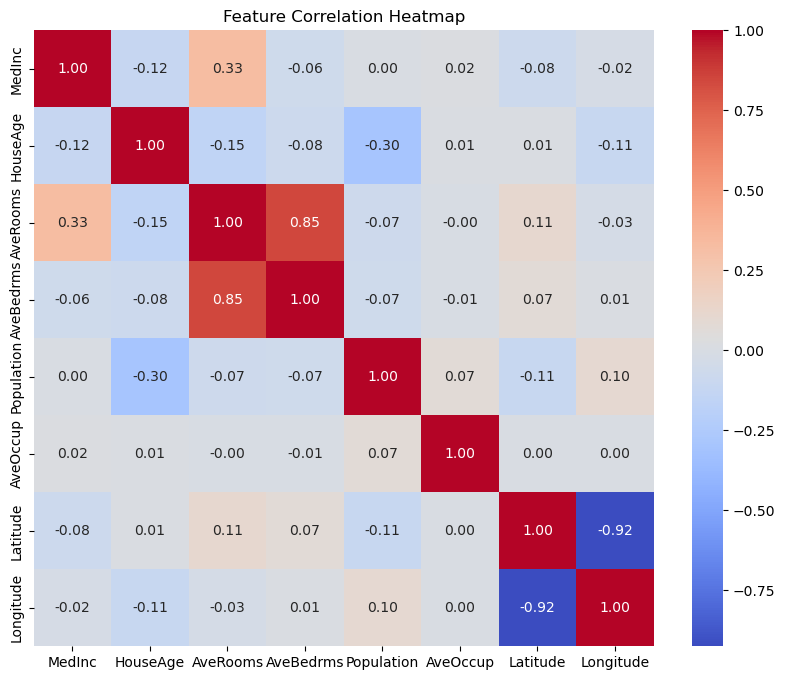

In [14]:
# b. Correlation Heatmap to see relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(data_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# c. PCA Scatter Plot (reduces to 2D for visualization)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

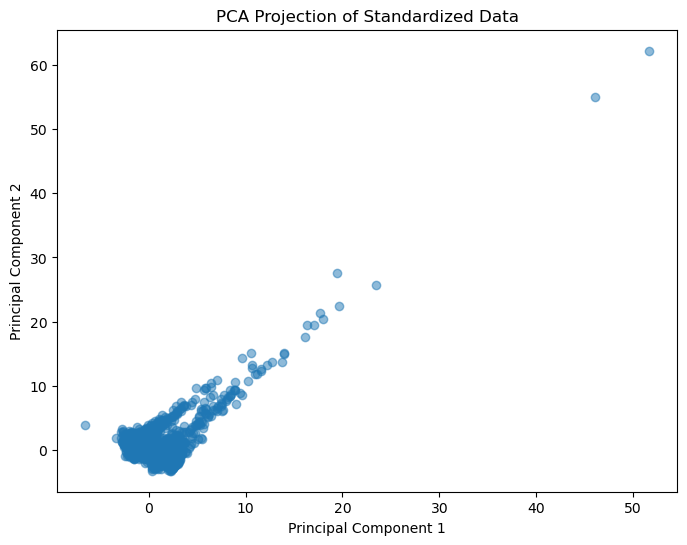


Data Exploration and Preprocessing Complete.


In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5)
plt.title("PCA Projection of Standardized Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("\nData Exploration and Preprocessing Complete.")